In [0]:
#import key libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
from sklearn.cluster import KMeans

In [0]:
#import data
film_data = pd.read_csv("DisneyMoviesDataset.csv", encoding='latin-1')  
film_data.head()

In [52]:
#drop N/As 
film_data = film_data.dropna(subset=['rotten_tomatoes', 'Running time (int)', 'metascore','Box_Office_Gross', 'Budget (float)'])

#drop variables not of interest
#film_data = film_data.drop(['Written by', 'Produced by', 'Starring'], axis=1)

# Convert Rotten_tomates Score from a string with a '%' to a float (decimal)
#film_data['rotten_tomatoes'] = film_data['rotten_tomatoes'].str.rstrip('%').astype('float') / 100.0
#                                                             ^ use str funcs to elim '%'     ^ divide by 100
# could also be:     .str[:-1].astype(...
# Convert metascore into >1 float (scale to match rotten_tomatoes)
#film_data['metascore'] = film_data['metascore'].astype('float') * 100.0
## Group By variable of interest
##film_data.groupby('rotten_tomatoes').count()

## View
print(film_data)

     Order                         title  \
2        2                     Pinocchio   
3        3                      Fantasia   
5        5                         Dumbo   
6        6                         Bambi   
10      10               Make Mine Music   
..     ...                           ...   
410    410  Maleficent: Mistress of Evil   
411    411            Lady and the Tramp   
413    413                     Frozen II   
416    416                        Onward   
425    425                         Mulan   

                                    Production company  \
2                              Walt Disney Productions   
3                              Walt Disney Productions   
5                              Walt Disney Productions   
6                              Walt Disney Productions   
10                             Walt Disney Productions   
..                                                 ...   
410  ['Walt Disney Pictures', 'Roth/Kirschenbaum Fi...   
411    

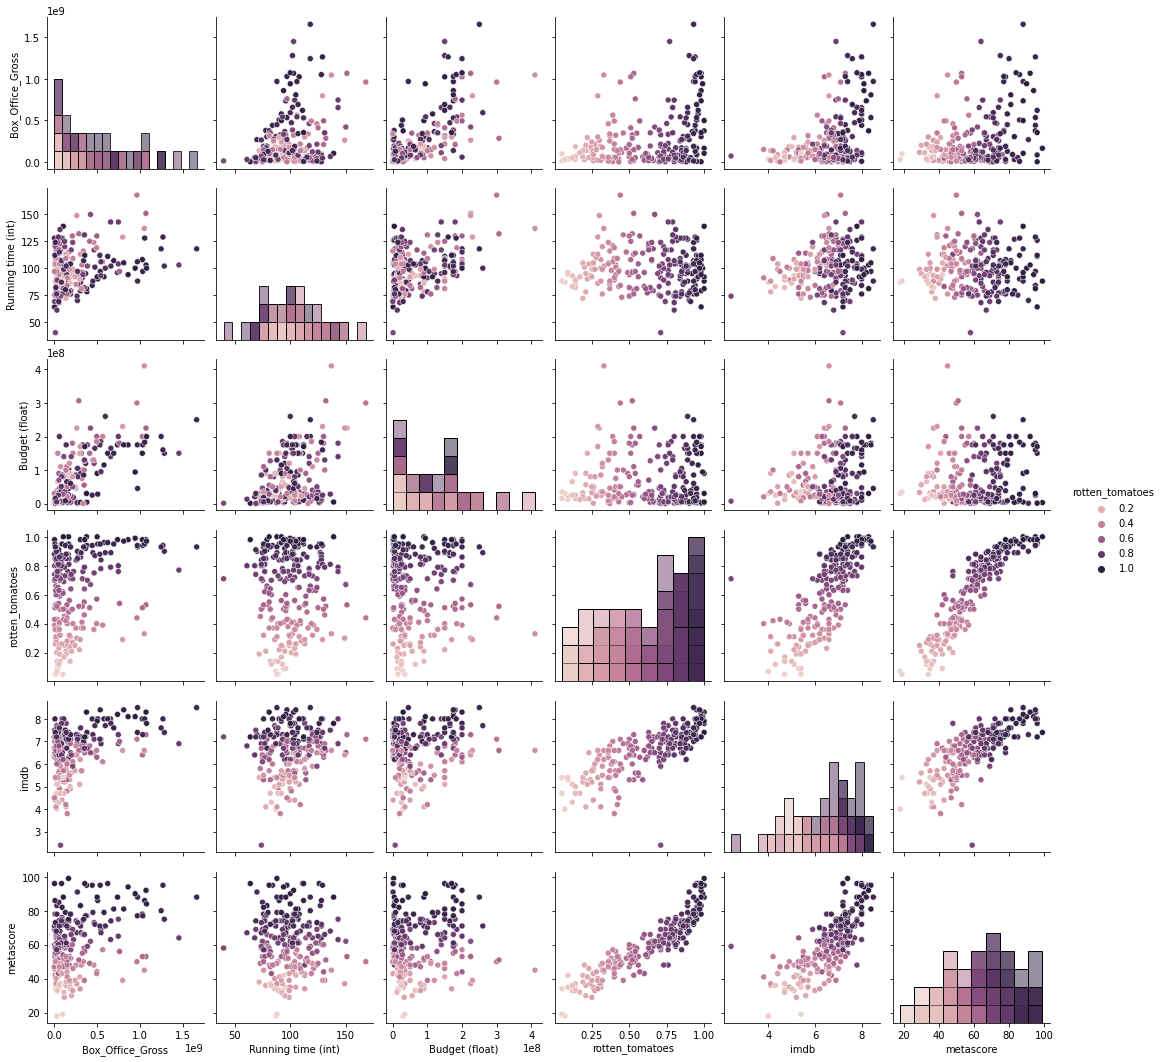

In [53]:


#create a pairplot 

sns.pairplot(film_data,  
             x_vars=['Box_Office_Gross','Running time (int)','Budget (float)','rotten_tomatoes','imdb', 'metascore'],
             y_vars=['Box_Office_Gross','Running time (int)','Budget (float)','rotten_tomatoes','imdb', 'metascore'],
             hue = 'rotten_tomatoes',
             diag_kind='hist')

In [54]:
## let’s use the graphing library plotly to create an interactive scatter plot that shows the 
## films plotted against our two variables of interest, Rotten Tomatoes and Box Office.

#plot your data via plotly 

fig = px.scatter(x=film_data.Box_Office_Gross, y=film_data.rotten_tomatoes, color =film_data.title)

fig.update_layout(title='Disney Films', title_x=0.5, xaxis_title='BoxOffice($)', yaxis_title='TomatoMeter(%)', showlegend=False)

fig.show()

Unsupported

In [55]:
## Remove outlier
# Remove row by filtering 
film_data = film_data[film_data['title'] != 'The Lion King']

## Re-run scatter plot without outliers
fig = px.scatter(x=film_data.Box_Office_Gross, y=film_data.rotten_tomatoes, color =film_data.title)

fig.update_layout(title='Disney Films', title_x=0.5, xaxis_title='BoxOffice($)', yaxis_title='TomatoMeter(%)', showlegend=False)

fig.show()

Unsupported

In [56]:
##Check formatting, and make sure there are no NA's before running Kmeans
##film_data.sort(['Box_Office_Gross'], descending=[1, 0])
film_data.sort_values('rotten_tomatoes', ascending=False)

,Order,title,Production company,Release date,Running time,Country,Language,Running time (int),Budget (float),Box_Office_Gross,Release date (datetime),imdb,metascore,rotten_tomatoes,Directed by
2,2,Pinocchio,Walt Disney Productions,"['February 7, 1940 ( Center Theatre )', 'Febru...",88 minutes,United States,English,88.0,2600000.0,164000000.0,2/7/40,7.4,99.0,1.00,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob..."
236,236,Toy Story 2,"['Walt Disney Pictures', 'Pixar Animation Stud...","['November 13, 1999 ( El Capitan Theatre )', '...",92 minutes,United States,English,92.0,90000000.0,497400000.0,11/13/99,7.9,88.0,1.00,John Lasseter
207,207,Toy Story,"['Walt Disney Pictures', 'Pixar Animation Stud...","['November 19, 1995 ( El Capitan Theatre )', '...",81 minutes,United States,English,81.0,30000000.0,373600000.0,11/19/95,8.3,95.0,1.00,John Lasseter
72,72,Mary Poppins,Walt Disney Productions,"['August 27, 1964']",139 minutes,United States,English,139.0,4400000.0,103100000.0,8/27/64,7.8,88.0,1.00,Robert Stevenson
262,262,Finding Nemo,"['Walt Disney Pictures', 'Pixar Animation Stud...","['May 30, 2003']",100 minutes,United States,English,100.0,94000000.0,940300000.0,5/30/03,8.1,90.0,0.99,Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,Blank Check,Walt Disney Pictures,"['February 11, 1994']",94 minutes,United States,English,94.0,13000000.0,30600000.0,2/11/94,5.3,42.0,0.09,Rupert Wainwright
199,199,Man of the House,"['Walt Disney Pictures', 'All Girl Productions...","['March 3, 1995']",96 minutes,United States,English,96.0,22000000.0,40070995.0,3/3/95,5.4,35.0,0.09,James Orr
223,223,Mr. Magoo,"['Walt Disney Pictures', 'UPA Productions']","['December 25, 1997']",87 minutes,United States,English,87.0,30000000.0,28900000.0,12/25/97,4.0,18.0,0.07,Stanley Tong
204,204,A Kid in King Arthur's Court,"['Walt Disney Pictures', 'Trimark Pictures', '...","['August 11, 1995']",89 minutes,NaN,English,89.0,15000000.0,13400000.0,8/11/95,4.7,34.0,0.05,Michael Gottlieb


In [57]:
##film_data['Box_Office_Gross'] = film_data['Box_Office_Gross'].astype('float') / 10000.0

#drop N/As 
film_data = film_data.dropna(subset=['Box_Office_Gross'])

film_data.sort_values('rotten_tomatoes')

,Order,title,Production company,Release date,Running time,Country,Language,Running time (int),Budget (float),Box_Office_Gross,Release date (datetime),imdb,metascore,rotten_tomatoes,Directed by
204,204,A Kid in King Arthur's Court,"['Walt Disney Pictures', 'Trimark Pictures', '...","['August 11, 1995']",89 minutes,NaN,English,89.0,15000000.0,13400000.0,8/11/95,4.7,34.0,0.05,Michael Gottlieb
326,326,Old Dogs,"['Walt Disney Pictures', 'Tapestry Films']","['November 25, 2009']",88 minutes,United States,English,88.0,35000000.0,96800000.0,11/25/09,5.4,19.0,0.05,Walt Becker
223,223,Mr. Magoo,"['Walt Disney Pictures', 'UPA Productions']","['December 25, 1997']",87 minutes,United States,English,87.0,30000000.0,28900000.0,12/25/97,4.0,18.0,0.07,Stanley Tong
199,199,Man of the House,"['Walt Disney Pictures', 'All Girl Productions...","['March 3, 1995']",96 minutes,United States,English,96.0,22000000.0,40070995.0,3/3/95,5.4,35.0,0.09,James Orr
190,190,Blank Check,Walt Disney Pictures,"['February 11, 1994']",94 minutes,United States,English,94.0,13000000.0,30600000.0,2/11/94,5.3,42.0,0.09,Rupert Wainwright
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,262,Finding Nemo,"['Walt Disney Pictures', 'Pixar Animation Stud...","['May 30, 2003']",100 minutes,United States,English,100.0,94000000.0,940300000.0,5/30/03,8.1,90.0,0.99,Andrew Stanton
72,72,Mary Poppins,Walt Disney Productions,"['August 27, 1964']",139 minutes,United States,English,139.0,4400000.0,103100000.0,8/27/64,7.8,88.0,1.00,Robert Stevenson
207,207,Toy Story,"['Walt Disney Pictures', 'Pixar Animation Stud...","['November 19, 1995 ( El Capitan Theatre )', '...",81 minutes,United States,English,81.0,30000000.0,373600000.0,11/19/95,8.3,95.0,1.00,John Lasseter
236,236,Toy Story 2,"['Walt Disney Pictures', 'Pixar Animation Stud...","['November 13, 1999 ( El Capitan Theatre )', '...",92 minutes,United States,English,92.0,90000000.0,497400000.0,11/13/99,7.9,88.0,1.00,John Lasseter


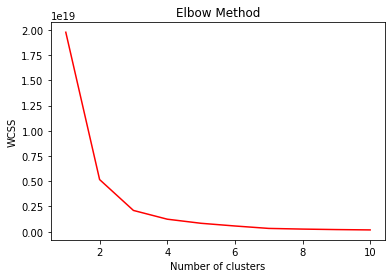

In [58]:
from sklearn.cluster import KMeans
import numpy as np
## Elbow method to select clusters

#just get the columns of interest for k-means & elbow method
BO_vs_RT_columns = film_data[['Box_Office_Gross', 'rotten_tomatoes']]
new_df = BO_vs_RT_columns

#find the optimial number of clusters using the elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(new_df)
    wcss.append(kmeans.inertia_)

#plot elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

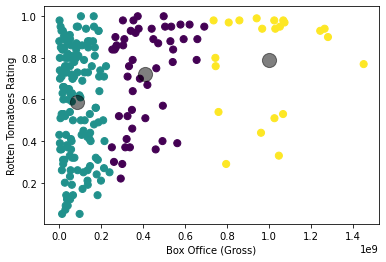

In [59]:
##Applying & Interpreting K-Means
#import package
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_df)
y_clusters = kmeans.predict(new_df)

#plot k-means & visualize the results
plt.scatter(new_df['Box_Office_Gross'], new_df['rotten_tomatoes'], c=y_clusters, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel("Box Office (Gross)")
plt.ylabel("Rotten Tomatoes Rating")
plt.legend
plt.show

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



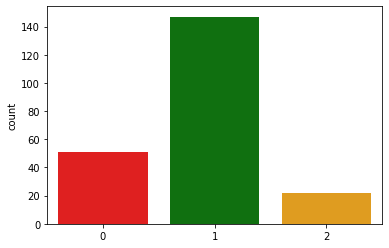

In [60]:
## .countplot method to get relative size of each cluster while also assigning them to numeric groupings

#set a customized color palette
customized_palette = ["red", "green", "orange"]
sns.set_palette(customized_palette)

# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)

In [62]:
## Calculate summary statistics to find cluster uniqueness

selected_columns2 = film_data[['title','Release date (datetime)','Box_Office_Gross', 'rotten_tomatoes', 'metascore', 'Running time (int)']]
film_data_2 = selected_columns2

#First, reassign a cluster to each row in intial dataset 

film_data_2 = film_data_2.assign(Cluster = y_clusters)

#film_data_2.head()

## Finally, Calculate summary statistics using groupby().mean()
cluster_avg = film_data_2.groupby(['Cluster']).mean()
print(cluster_avg)

         Box_Office_Gross  rotten_tomatoes  metascore  Running time (int)
Cluster                                                                  
0            4.072196e+08         0.724706  66.901961          102.352941
1            8.221018e+07         0.587755  57.068027           96.353741
2            9.967318e+08         0.791818  72.590909          114.818182


In [75]:
print(film_data_3)

     Box_Office_Gross  rotten_tomatoes  Running time (int)  Cluster
2        1.640000e+08             1.00                88.0        1
3        8.330000e+07             0.95               126.0        1
5        1.300000e+06             0.98                64.0        1
6        2.674000e+08             0.90                70.0        0
10       3.275000e+06             0.70                75.0        1
..                ...              ...                 ...      ...
410      4.917000e+08             0.40               119.0        0
411      1.870000e+08             0.93               104.0        1
413      1.450000e+09             0.77               103.0        2
416      1.364000e+08             0.88               102.0        1
425      5.700000e+07             0.86               115.0        1

[220 rows x 4 columns]


In [65]:
## Snake Plot: to study variation across variables of interest for each cluster

snake_plot_columns = film_data_2[['Box_Office_Gross', 'rotten_tomatoes', 'Running time (int)', 'Cluster']]
film_data_3 = snake_plot_columns

#Normalize subset variables of interest 
def normalize(film_data_3):
    dataNorm=((film_data_3-film_data_3.min())/(film_data_3.max()-film_data_3.min()))
    dataNorm["Cluster"]=film_data_3["Cluster"]
    return dataNorm

## Assign new df film_data_3_normalied for use in Snake Plot
film_data_3_normalized=normalize(film_data_3)

print(film_data_3_normalized)

     Box_Office_Gross  rotten_tomatoes  Running time (int)  Cluster
2            0.113103         1.000000            0.375000        1
3            0.057448         0.947368            0.671875        1
5            0.000897         0.978947            0.187500        1
6            0.184414         0.894737            0.234375        0
10           0.002259         0.684211            0.273438        1
..                ...              ...                 ...      ...
410          0.339103         0.368421            0.617188        0
411          0.128965         0.926316            0.500000        1
413          1.000000         0.757895            0.492188        2
416          0.094069         0.873684            0.484375        1
425          0.039310         0.852632            0.585938        1

[220 rows x 4 columns]


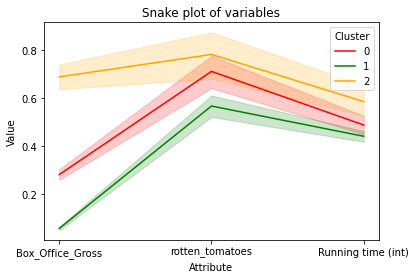

In [66]:
##pandas .melt method to rearrange the normalized dataframe into an appropriate layout
film_data_3_normalized_melt = pd.melt(film_data_3_normalized.reset_index(),
                                       id_vars=['Cluster'],
                                       value_vars=['Box_Office_Gross', 'rotten_tomatoes', 'Running time (int)'],
                                       var_name='Attribute',
                                       value_name='Value')

## Run the Snake Plot

plt.title('Snake plot of variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=film_data_3_normalized_melt, palette=customized_palette)

In [67]:

film_data_3.sort_values(by=['Box_Office_Gross', 'Cluster'], ascending=False)

,Box_Office_Gross,rotten_tomatoes,Running time (int),Cluster
413,1.450000e+09,0.77,103.0,2
362,1.280000e+09,0.90,102.0,2
392,1.264000e+09,0.94,129.0,2
400,1.243000e+09,0.93,118.0,2
408,1.073000e+09,0.97,100.0,2
...,...,...,...,...
22,2.600000e+06,0.74,69.0,1
13,2.560000e+06,0.80,75.0,1
5,1.300000e+06,0.98,64.0,1
318,1.692000e+02,0.43,97.0,1


ValueError: ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (5).

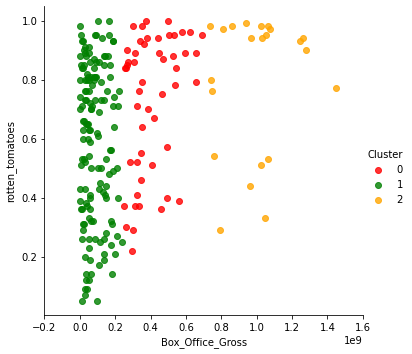

In [70]:

facet = sns.lmplot(data=film_data_3, x='Box_Office_Gross', y='rotten_tomatoes', hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True, palette=customized_palette)

facet.set_xticklabels(['0','100M', '200M', '300M', '400M'])

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#add text annotations 
plt.text(1.45, 0.77, "Frozen II", size='medium', color='black')
plt.text(0.6908, 0.95, "Moana", size='medium', color='black')
plt.text(0.2393, 0.25, "Planes", size='medium', color='black')
plt.title("K Means Cluster of Disney Films")

In [74]:
#3d clustering
##https://plotly.com/python/v3/3d-point-clustering/

import pandas as pd
import numpy as np  
%matplotlib inline  
from plotly import __version__ 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.offline as py



scatter = dict(
    mode = "markers",
    name = "y",
    type = "scatter3d",
    x = film_data_3['Box_Office_Gross'], y = film_data_3['rotten_tomatoes'], z = film_data_3['Running time (int)'],
    marker = dict( size=2, color="rgb(23, 190, 207)" )
)
clusters = dict(
    alphahull = 7,
    name = "y",
    opacity = 0.1,
    type = "mesh3d",
    x = film_data_3['Box_Office_Gross'], y = film_data_3['rotten_tomatoes'], z = film_data_3['Running time (int)']
)
layout = dict(
    title = '3d point clustering',
    scene = dict(
        xaxis = dict( zeroline=False ),
        yaxis = dict( zeroline=False ),
        zaxis = dict( zeroline=False ),
    )
)
fig = dict( data=[scatter, clusters], layout=layout )
# Use py.iplot() for IPython notebook
py.iplot(fig, filename='3d point clustering')

Unsupported

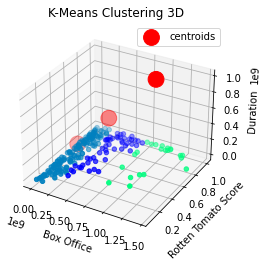

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(kmeans.cluster_centers_[:, 0],
                     kmeans.cluster_centers_[:,1],
                     kmeans.cluster_centers_[:,0],
                     s=250,
                     marker='o',
                     c='red',
                     label='centroids')
scatter = ax.scatter(film_data_3['Box_Office_Gross'],film_data_3['rotten_tomatoes'], film_data_3['Running time (int)'],
                     c=y_clusters,s=20, cmap='winter')

ax.set_title('K-Means Clustering 3D')
ax.set_xlabel('Box Office')
ax.set_ylabel('Rotten Tomato Score')
ax.set_zlabel('Duration')
ax.legend()
plt.show()